## This Project is about the implementation of Portfolio Optimization With Conditional Value-at-Risk (CVaR) Objective and  Constraints.

## Conditional Value-at-Risk

Let $f(x, y)$ be the loss associated with decision vector $x$, to be chosen from
a certain subset $X$ of $\mathbb{R}^n$, and the random vector $y$ in $\mathbb{R}^m$.

 Vector $x$ can be interpreted as representing a portfolio,

with vector $X$ as the set of available portfolios.

The vector $y$ stands for uncertaintes ( some market parameters, that can affect the loss.) this loss might be negative, and thus, in effect constitute a gain.

## AN APPLICATION TO PORTFOLIO OPTIMIZATION 

###One Portfolio Optimization Model with Transaction Costs.

Let us consider a portfolio $n$ different financial instruments in the market, $si$, ($i = 1,..., n$).
Let ***x***$^0$ - ($x^0_1$, $x^0_2$,...,$x^0_n$) be the postitions, e.g., number of shares, of each instrument in the initial portfolio, and let ***x*** = ($x_1$, $x_2$,...,$x_n$) be the position in the optimal portfolio that we intend to find using the algorithmn. Both, ***x***$^0$ and ***x***, describe how many of each instrument there are in the respective portfolios. The initial prices for the instruments are given by ***q*** = ($q_1$, $q_2$,..., $q_n$).
The product ***q***$^T$***x***$^0$ is thus the initial portfolio. The scenario-dependent prices for each for each instrument at the end of the period are give by ***y*** = ($y_1$,$y_2$,...,$y_n$). The transaction cost, $c_i$, is defined as a fixed percentage cost of the value traded. The loss function over the period is $f$(***x***,***y***, ***x***$^0$,***q***) = ***-y***$^T$***x*** + ***q***$^T$***x***$^0$.

# 0.  Install pyportfolio library to use.

# 1. Mount the drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Import all the libraries needed for the work

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import  warnings
import numpy as np
import cvxpy as cp
import pandas as pd
import seaborn as sns
from copy import copy
from pandas_datareader import data as web
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

%matplotlib inline
import scipy.optimize as sco
from datetime import datetime
import scipy.optimize as sco


import glob
import os
import math

from matplotlib import  cm
import scipy 
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [ ]:
# Import pandas-datareader and yahoo finance in other to download the stocks from yahoo finance
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

## 3. Load the stocks_data and view all the stocks_data, create dates_rang for the five(5) years period.

In [ ]:
# load the stocks_data
S_and_P_100_stocks = [data.split('.')[0] for data in sorted(os.listdir("/content/drive/MyDrive/S&P 100 Stocks"))]  

In [ ]:
# # print out the number of stocks
print("Total number of S_and_P_100_stocks : {}".format(len(S_and_P_100_stocks[0:]))) 

Total number of S_and_P_100_stocks : 100


In [ ]:
# #print out the name of the S_and_P_100_stocks
print("These are the stocks under consideration:")

for i in S_and_P_100_stocks[0:]:
  print(i)

These are the stocks under consideration:
AAPL
ABBV
ABT
ACN
ADBE
AIG
AMGN
AMT
AMZN
AVGO
AXP
BA
BAC
BIIB
BK
BKNG
BLK
BMY
BRK-B
C
CAT
CHTR
CL
CMCSA
COF
COP
COST
CRM
CSCO
CVS
CVX
DD
DHR
DIS
DOW
DUK
EMR
EXC
F
FB
FDX
GD
GE
GILD
GM
GOOG
GOOGL
GS
HD
HON
IBM
INTC
JNJ
JPM
KHC
KO
LIN
LLY
LMT
LOW
MA
MCD
MDLZ
MDT
MET
MMM
MO
MRK
MS
MSFT
NFLX
NKE
NVDA
ORCL
PEP
PFE
PG
PM
PYPL
QCOM
RTX
SBUX
SO
SPG
T
TGT
TMO
TMUS
TSLA
TXN
UNH
UNP
UPS
USB
V
VZ
WBA
WFC
WMT
XOM


#4. Choose the five stocks/portfolio to trade for the first period of two weeks.

In [ ]:
# Get the five(5) stocks symbols/ tickers in the portfolio 
# FAIGT which means (FACEBOOK, AMAZON, IBM, GOOGL, TESLA)
assets = ["FB", "AMZN", "IBM", "GOOGL", "TSLA"]
print("Thes are the choice of stocks to trade:")
print(assets)

Thes are the choice of stocks to trade:
['FB', 'AMZN', 'IBM', 'GOOGL', 'TSLA']


In [ ]:
# Assign weight to the stocks
# having 20% of our money in these companies
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# Get the stocks/ portfolio starting date 
stockStartDate = "2020-03-15"
stockStartDate

'2020-03-15'

In [ ]:
# Get the stocks/ portfolio end date
stockEndDate = "2020-03-28"
stockEndDate

'2020-03-28'

In [ ]:
# Create a DataFrame to store the Adjusted close price of the stocks
df = pd.DataFrame()

# Store the Adjusted close price of the stocks into the df
for stock in assets:
  df[stock]= web.DataReader(stock, data_source = "yahoo", start = stockStartDate, end = stockEndDate)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Show df
df

,FB,AMZN,IBM,GOOGL,TSLA
Date,,,,,
2020-03-16,146.009995,1689.150024,86.586060,1073.000000,89.014000
2020-03-17,149.419998,1807.839966,93.201477,1118.060059,86.040001
2020-03-18,146.960007,1830.000000,90.492378,1091.189941,72.244003
2020-03-19,153.130005,1880.930054,87.687172,1111.670044,85.528000
2020-03-20,149.729996,1846.089966,83.361374,1068.209961,85.505997
2020-03-23,148.100006,1902.829956,82.819534,1054.130005,86.858002
2020-03-24,160.979996,1940.099976,92.179016,1130.010010,101.000000
2020-03-25,156.210007,1885.839966,92.502365,1101.619995,107.849998
2020-03-26,163.339996,1955.489990,98.654617,1162.920044,105.632004


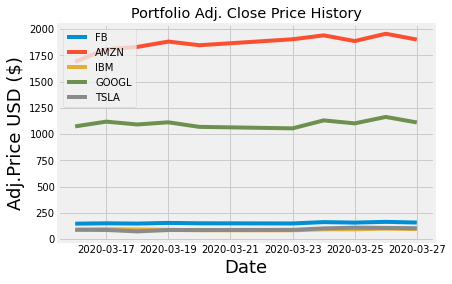

In [ ]:
# Visualize the stock/ portfolio 
title = "Portfolio Adj. Close Price History"

# Get the stocks to visualize
my_stocks = df 

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)


plt.title(title)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj.Price USD ($)", fontsize=18)
plt.legend(my_stocks.columns.values, loc="upper left")


## Calculate Single Stocks Daily Returns for the five stocks/ portfolio

In [ ]:
# Calculate daily return  for a single security 
# Let's take the AMAZN as an example first
AMAZN_df = df["AMZN"]
AMAZN_df

Date
2020-03-16    1689.150024
2020-03-17    1807.839966
2020-03-18    1830.000000
2020-03-19    1880.930054
2020-03-20    1846.089966
2020-03-23    1902.829956
2020-03-24    1940.099976
2020-03-25    1885.839966
2020-03-26    1955.489990
2020-03-27    1900.099976
Name: AMZN, dtype: float64

In [ ]:
# Normalize the AMAZN stock
AMAZN_daily_return = AMAZN_df.copy()
for j in range(1, len(AMAZN_df)):
  AMAZN_daily_return[j] = ( (AMAZN_df[j]- AMAZN_df[j-1]) /AMAZN_df[j-1]) *100

AMAZN_daily_return[0] = 0
AMAZN_daily_return

Date
2020-03-16    0.000000
2020-03-17    7.026607
2020-03-18    1.225774
2020-03-19    2.783063
2020-03-20   -1.852280
2020-03-23    3.073522
2020-03-24    1.958663
2020-03-25   -2.796764
2020-03-26    3.693316
2020-03-27   -2.832539
Name: AMZN, dtype: float64

In [ ]:
FB_df = df["FB"]
FB_df

Date
2020-03-16    146.009995
2020-03-17    149.419998
2020-03-18    146.960007
2020-03-19    153.130005
2020-03-20    149.729996
2020-03-23    148.100006
2020-03-24    160.979996
2020-03-25    156.210007
2020-03-26    163.339996
2020-03-27    156.789993
Name: FB, dtype: float64

In [ ]:
# Normalize the FB stock
FB_daily_return = FB_df.copy()
for j in range(1, len(FB_df)):
  FB_daily_return[j] = ( (FB_df[j]- FB_df[j-1]) /FB_df[j-1]) *100

FB_daily_return[0] = 0
FB_daily_return

Date
2020-03-16    0.000000
2020-03-17    2.335459
2020-03-18   -1.646360
2020-03-19    4.198420
2020-03-20   -2.220342
2020-03-23   -1.088619
2020-03-24    8.696819
2020-03-25   -2.963094
2020-03-26    4.564362
2020-03-27   -4.010042
Name: FB, dtype: float64

In [ ]:
IBM_df = df["IBM"]
IBM_df

Date
2020-03-16    86.586060
2020-03-17    93.201477
2020-03-18    90.492378
2020-03-19    87.687172
2020-03-20    83.361374
2020-03-23    82.819534
2020-03-24    92.179016
2020-03-25    92.502365
2020-03-26    98.654617
2020-03-27    94.407463
Name: IBM, dtype: float64

In [ ]:
# Normalize the IBM stock
IBM_daily_return = IBM_df.copy()
for j in range(1, len(IBM_df)):
  IBM_daily_return[j] = ( (IBM_df[j]- IBM_df[j-1]) /IBM_df[j-1]) *100

IBM_daily_return[0] = 0
IBM_daily_return

Date
2020-03-16     0.000000
2020-03-17     7.640280
2020-03-18    -2.906712
2020-03-19    -3.099937
2020-03-20    -4.933217
2020-03-23    -0.649989
2020-03-24    11.301056
2020-03-25     0.350784
2020-03-26     6.650913
2020-03-27    -4.305074
Name: IBM, dtype: float64

In [ ]:
GOOGL_df = df["GOOGL"]
GOOGL_df

Date
2020-03-16    1073.000000
2020-03-17    1118.060059
2020-03-18    1091.189941
2020-03-19    1111.670044
2020-03-20    1068.209961
2020-03-23    1054.130005
2020-03-24    1130.010010
2020-03-25    1101.619995
2020-03-26    1162.920044
2020-03-27    1110.260010
Name: GOOGL, dtype: float64

In [ ]:
GOOGL_daily_return = GOOGL_df.copy()
for j in range(1, len(GOOGL_df)):
  GOOGL_daily_return[j] = ( (GOOGL_df[j]- GOOGL_df[j-1]) /GOOGL_df[j-1]) *100

GOOGL_daily_return[0] = 0
GOOGL_daily_return

Date
2020-03-16    0.000000
2020-03-17    4.199446
2020-03-18   -2.403280
2020-03-19    1.876860
2020-03-20   -3.909441
2020-03-23   -1.318089
2020-03-24    7.198354
2020-03-25   -2.512368
2020-03-26    5.564537
2020-03-27   -4.528259
Name: GOOGL, dtype: float64

In [ ]:
TSLA_df = df["TSLA"]
TSLA_df

Date
2020-03-16     89.014000
2020-03-17     86.040001
2020-03-18     72.244003
2020-03-19     85.528000
2020-03-20     85.505997
2020-03-23     86.858002
2020-03-24    101.000000
2020-03-25    107.849998
2020-03-26    105.632004
2020-03-27    102.872002
Name: TSLA, dtype: float64

In [ ]:
TSLA_daily_return = TSLA_df.copy()
for j in range(1, len(TSLA_df)):
  TSLA_daily_return[j] = ( (TSLA_df[j]- TSLA_df[j-1]) /TSLA_df[j-1]) *100

TSLA_daily_return[0] = 0
TSLA_daily_return

Date
2020-03-16     0.000000
2020-03-17    -3.341046
2020-03-18   -16.034400
2020-03-19    18.387681
2020-03-20    -0.025726
2020-03-23     1.581182
2020-03-24    16.281745
2020-03-25     6.782177
2020-03-26    -2.056555
2020-03-27    -2.612847
Name: TSLA, dtype: float64

## Calculate the five Stocks Daily Returns and Weekly Returns

In [ ]:
# Show the daily return of the stocks
returns = df.pct_change()
returns

,FB,AMZN,IBM,GOOGL,TSLA
Date,,,,,
2020-03-16,NaN,NaN,NaN,NaN,NaN
2020-03-17,0.023355,0.070266,0.076403,0.041994,-0.033410
2020-03-18,-0.016464,0.012258,-0.029067,-0.024033,-0.160344
2020-03-19,0.041984,0.027831,-0.030999,0.018769,0.183877
2020-03-20,-0.022203,-0.018523,-0.049332,-0.039094,-0.000257
2020-03-23,-0.010886,0.030735,-0.006500,-0.013181,0.015812
2020-03-24,0.086968,0.019587,0.113011,0.071984,0.162817
2020-03-25,-0.029631,-0.027968,0.003508,-0.025124,0.067822
2020-03-26,0.045644,0.036933,0.066509,0.055645,-0.020566


In [ ]:
returns = returns.dropna()

In [ ]:
# Create and show weekly covariance matrix
cov_matrix_weekly = returns.cov() * 10
cov_matrix_weekly

,FB,AMZN,IBM,GOOGL,TSLA
FB,0.018295,0.008706,0.019670,0.017715,0.025019
AMZN,0.008706,0.011008,0.011605,0.010474,-0.000024
IBM,0.019670,0.011605,0.035072,0.023214,0.015745
GOOGL,0.017715,0.010474,0.023214,0.018953,0.018600
TSLA,0.025019,-0.000024,0.015745,0.018600,0.111384


In [ ]:
# Calculate portfolio variance 
port_variance = np.dot(weights.T, np.dot(cov_matrix_weekly, weights))
port_variance

0.019846363987127906

In [ ]:
# Calculate the portfolio volatility (standard deviation)
port_volatility = np.sqrt(port_variance)
port_volatility

0.1408771237182528

In [ ]:
# Calculate the  portfolio weekly return for 10 days
porfolioSimpleWeeklyReturn = np.sum(returns.mean() * weights) * 10
porfolioSimpleWeeklyReturn

0.1184978628717511

In [ ]:
# Calculate the expected weekly return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100 ) + "%"
percent_vols = str(round(port_volatility, 2) * 100 ) + "%"
percent_ret = str(round(porfolioSimpleWeeklyReturn, 2) * 100 ) + "%"

print("Expected weekly return: "+ percent_ret)
print("Weekly volatility / risk: "+ percent_vols)
print("Weekly variance: "+ percent_var)

Expected weekly return: 12.0%
Weekly volatility / risk: 14.000000000000002%
Weekly variance: 2.0%


In [ ]:
pip install PyportfolioOpt

In [ ]:
# import the portfolio libraries
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt.expected_returns import returns_from_prices
from pypfopt.objective_functions import ex_post_tracking_error
from pypfopt.efficient_frontier import EfficientFrontier
import scipy.optimize as sco

In [ ]:
# Optimize the  Porfolio Optimization

# Calculate the expected returns and the weekly sample coverance matrix of assets returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharp ratio
ef = EfficientFrontier(mu, S, )
weights =  ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.0), ('AMZN', 0.82301), ('IBM', 0.0), ('GOOGL', 0.0), ('TSLA', 0.17699)])
Expected annual return: 3137.7%
Annual volatility: 52.5%
Sharpe Ratio: 59.72


(31.37705032173042, 0.5250282537423774, 59.72450072585389)

# Comput CVaR

In [ ]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 3306.0%
Conditional Value at Risk: 2.78%


## Building a convex efficient frontier, which explains the risk-return trade-off.

In [ ]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True, risk_free_rate=0.0);

Expected annual return: 3137.5%
Annual volatility: 52.5%
Sharpe Ratio: 59.76


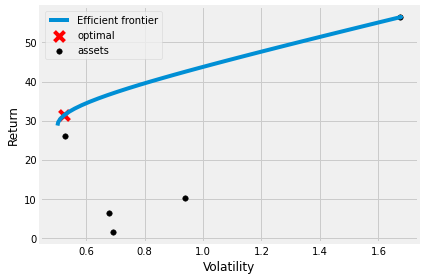

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 3000)

allocation , leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AMZN': 1, 'TSLA': 6}
funds remaining: $482.67


In [ ]:
 def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 10
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(10)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio
def simulate_random_portfolios(total_portfolio_value, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, total_portfolio_value))
    for i in range(total_portfolio_value):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [stock for stock in assets])
        
    return results_df

In [ ]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
total_portfolio_value = 3000
rf = 0
results_frame = simulate_random_portfolios(total_portfolio_value, mean_returns, cov, rf)

In [ ]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
max_sharpe_port.to_frame()

,2553
ret,0.145285
stdev,0.111684
sharpe,1.300856
FB,0.042134
AMZN,0.682682
IBM,0.040913
GOOGL,0.033262
TSLA,0.201008


# Below is the visualized the results of all the simulated portfolios, plotting each portfolio by it’s corresponding values of weekly return (y-axis) and weekly volatility (x-axis).

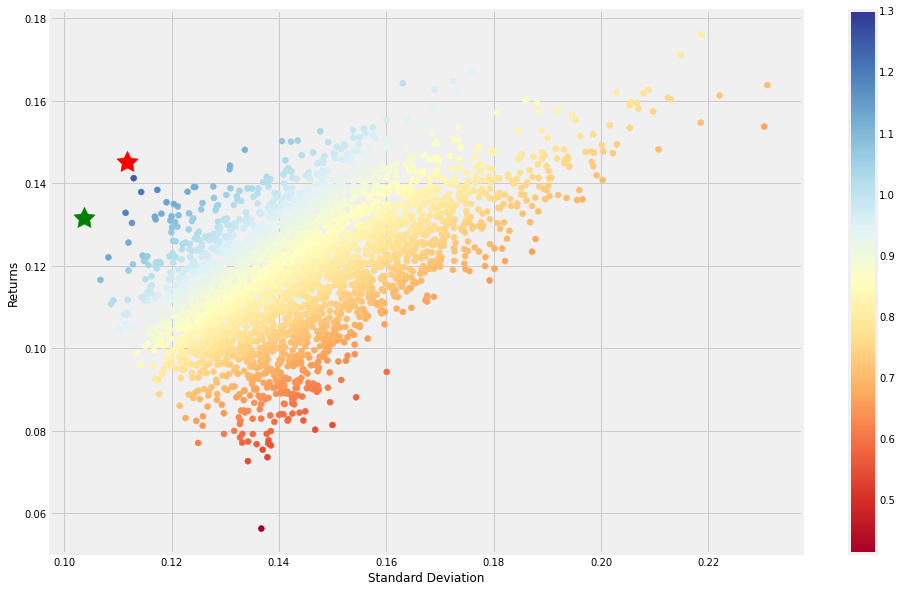

In [ ]:
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
min_vol_port
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [ ]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,FB,AMZN,IBM,GOOGL,TSLA
2553,0.145285,0.111684,1.300856,0.042134,0.682682,0.040913,0.033262,0.201008


In [ ]:
# maximum Sharpe portfolio
pd.options.display.max_rows = None
max_sharpe_port.to_frame()

,2553
ret,0.145285
stdev,0.111684
sharpe,1.300856
FB,0.042134
AMZN,0.682682
IBM,0.040913
GOOGL,0.033262
TSLA,0.201008


In [ ]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,FB,AMZN,IBM,GOOGL,TSLA
589,0.131561,0.10372,1.268419,0.053386,0.76556,0.0751,0.050277,0.055676


In [ ]:
#the minimum variance portfolio.
pd.options.display.max_rows = None
min_vol_port.to_frame()

,589
ret,0.131561
stdev,0.103720
sharpe,1.268419
FB,0.053386
AMZN,0.765560
IBM,0.075100
GOOGL,0.050277
TSLA,0.055676


In [ ]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 10
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(10)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

In [ ]:
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=assets).T

,FB,AMZN,IBM,GOOGL,TSLA
0,0.0,0.87,0.0,0.0,0.13


In [ ]:
pd.options.display.max_rows = None
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=assets, columns=['Weights'])

,Weights
FB,0.00
AMZN,0.87
IBM,0.00
GOOGL,0.00
TSLA,0.13


In [ ]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(10)
    return portfolio_std
def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_variance = min_variance(mean_returns, cov)

In [ ]:
pd.options.display.max_rows = None
pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=assets, columns=['Weights'])

,Weights
FB,0.00
AMZN,0.91
IBM,0.00
GOOGL,0.00
TSLA,0.09


#5. Portfolio weights that minimise the Conditional Value at Risk (CVaR).
Creating two functions that returns the parametric portfolio CVaR to a confidence level determined by the value of the “alpha” argument.
Scale the portfolio standard deviation by the square root of the “days” value.
CVaR is sometimes calculated in a way that the mean returns of the portfolio are considered to be small enough that they can be entered into the equation with a zero value.

In [ ]:
def calc_portfolio_perf_CVaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = days * np.sum(mean_returns * weights) 
    portfolio_std = np.sqrt(days) *  np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
    portfolio_CVaR = abs( portfolio_return - (portfolio_std  * stats.norm.pdf(stats.norm.ppf(alpha)) * alpha**-1))
    return  portfolio_return, portfolio_std , portfolio_CVaR


def simulate_random_portfolios_CVaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((4+len(mean_returns)-1, num_portfolios))

    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_CVaR = calc_portfolio_perf_CVaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] =  portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_CVaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    final_resul = pd.DataFrame(results_matrix.T,columns=['ret','stdev','CVaR'] + [stock for stock in assets])
        
    return final_resul

In [ ]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
total_portfolio_value = 3000
risk_free = 0
days = 10
alpha = 0.05
results = simulate_random_portfolios_CVaR(total_portfolio_value, mean_returns, cov, alpha, days)

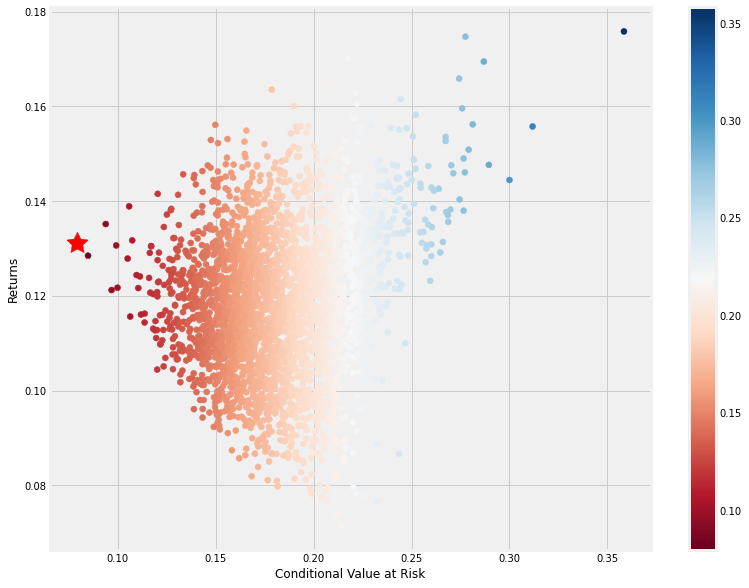

In [ ]:
min_CVaR_port = results.iloc[results['CVaR'].idxmin()]
width = 12
height = 10
plt.subplots(figsize=(width, height))
plt.scatter(results.CVaR,results.ret,c=results.CVaR,cmap='RdBu')
plt.xlabel('Conditional Value at Risk')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum CVaR portfolio
plt.scatter(min_CVaR_port[2],min_CVaR_port[0],marker=(5,1,0),color='r',s=500)

In [ ]:
pd.options.display.max_rows = None
min_CVaR_port.to_frame()

,702
ret,0.131113
stdev,0.102038
CVaR,0.079362
FB,0.158309
AMZN,0.742320
IBM,0.010905
GOOGL,0.023487
TSLA,0.064979


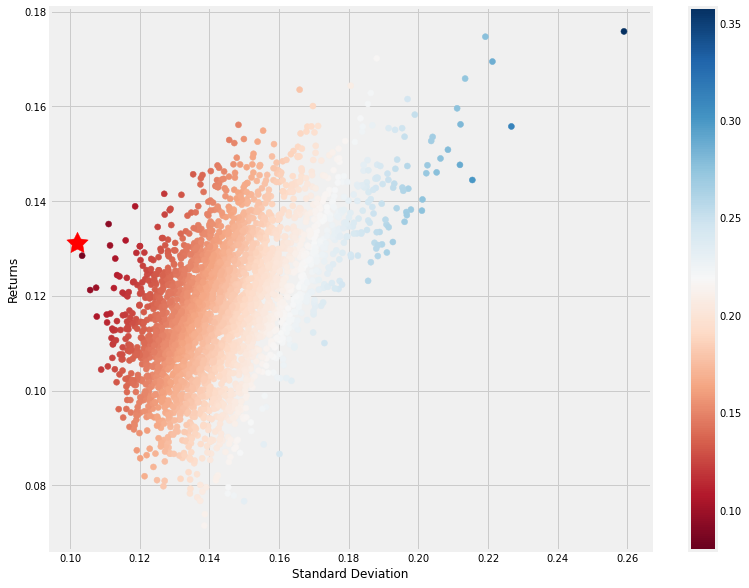

In [ ]:
min_CVaR_port = results.iloc[results['CVaR'].idxmin()]
width = 12
height = 10
plt.subplots(figsize=(width, height))
plt.scatter(results.stdev,results.ret,c=results.CVaR,cmap='RdBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_CVaR_port[1],min_CVaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [ ]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def calc_portfolio_CVaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = days * np.sum(mean_returns * weights) 
    portfolio_std =  np.sqrt(days) * np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_var
def min_CVaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha, days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_CVaR, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_CVaR = min_CVaR(mean_returns, cov, alpha, days)

In [ ]:
pd.options.display.max_rows = None
pd.DataFrame([round(x,3) for x in min_port_CVaR['x']],index=assets, columns=['Weights'])

,Weights
FB,0.000
AMZN,0.873
IBM,0.000
GOOGL,0.000
TSLA,0.127


#6. Trading the Choosen five stocks/ portfolio for the period of two years

In [ ]:
# Get the five(5) stocks symbols/ tickers in the portfolio 
# FAIGT which means (FACEBOOK, AMAZON, IBM, GOOGL, TESLA)
stockss = ["FB", "AMZN", "IBM", "GOOGL", "TSLA"]
print("Thes are the choice of stocks to trade:")
print(stockss)

Thes are the choice of stocks to trade:
['FB', 'AMZN', 'IBM', 'GOOGL', 'TSLA']


In [ ]:
# Assign weight to the stocks
# having 20% of our money in these companies
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# Get the stocks/ portfolio starting date 
stockStartDate = "2018-02-01"
stockStartDate

'2018-02-01'

In [ ]:
# Get the stocks/ portfolio end date
stockEndDate = "2020-02-28"
stockEndDate

'2020-02-28'

In [ ]:
# Create a DataFrame to store the Adjusted close price of the stocks
df = pd.DataFrame()

# Store the Adjusted close price of the stocks into the df
for stock in stockss:
  df[stock]= web.DataReader(stock, data_source = "yahoo", start = stockStartDate, end = stockEndDate)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,FB,AMZN,IBM,GOOGL,TSLA
Date,,,,,
2018-02-01,193.089996,1390.000000,128.226562,1181.589966,69.849998
2018-02-02,190.279999,1429.949951,125.565689,1119.199951,68.750000
2018-02-05,181.259995,1390.000000,120.433464,1062.390015,66.625999
2018-02-06,185.309998,1442.839966,122.652176,1084.430054,66.793999
2018-02-07,180.179993,1416.780029,121.475693,1055.410034,69.000000
2018-02-08,171.580002,1350.500000,117.680336,1007.710022,63.046001
2018-02-09,176.110001,1339.599976,119.211243,1046.270020,62.084000
2018-02-12,176.410004,1386.229980,120.718224,1054.560059,63.146000
2018-02-13,173.149994,1414.510010,120.199936,1054.140015,64.732002


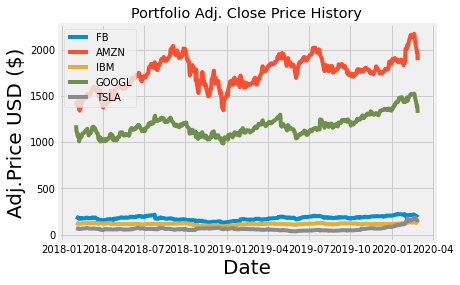

In [ ]:
# Visualize the stock/ portfolio 
title = "Portfolio Adj. Close Price History"

# Get the stocks to visualize
my_portfolio = df 

# Create and plot the graph
for c in my_portfolio.columns.values:
  plt.plot(my_portfolio[c], label = c)


plt.title(title)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Adj.Price USD ($)", fontsize=20)
plt.legend(my_stocks.columns.values, loc="upper left")

# Calculate Single Stocks Yearly Returns for the five stocks/ portfolio

In [ ]:
# Calculate daily return  for a single security 
# Let's take the AMAZN as  first
AMAZN_df = df["AMZN"]
AMAZN_df

Date
2018-02-01    1390.000000
2018-02-02    1429.949951
2018-02-05    1390.000000
2018-02-06    1442.839966
2018-02-07    1416.780029
2018-02-08    1350.500000
2018-02-09    1339.599976
2018-02-12    1386.229980
2018-02-13    1414.510010
2018-02-14    1451.050049
2018-02-15    1461.760010
2018-02-16    1448.689941
2018-02-20    1468.349976
2018-02-21    1482.920044
2018-02-22    1485.339966
2018-02-23    1500.000000
2018-02-26    1521.949951
2018-02-27    1511.979980
2018-02-28    1512.449951
2018-03-01    1493.449951
2018-03-02    1500.250000
2018-03-05    1523.609985
2018-03-06    1537.640015
2018-03-07    1545.000000
2018-03-08    1551.859985
2018-03-09    1578.890015
2018-03-12    1598.390015
2018-03-13    1588.180054
2018-03-14    1591.000000
2018-03-15    1582.319946
2018-03-16    1571.680054
2018-03-19    1544.930054
2018-03-20    1586.510010
2018-03-21    1581.859985
2018-03-22    1544.920044
2018-03-23    1495.560059
2018-03-26    1555.859985
2018-03-27    1497.050049
2018-03

In [ ]:
# Normalize the AMAZN stock
AMAZN_daily_return = AMAZN_df.copy()
for j in range(1, len(AMAZN_df)):
  AMAZN_daily_return[j] = ( (AMAZN_df[j]- AMAZN_df[j-1]) /AMAZN_df[j-1]) *100

AMAZN_daily_return[0] = 0
AMAZN_daily_return

Date
2018-02-01    0.000000
2018-02-02    2.874097
2018-02-05   -2.793801
2018-02-06    3.801436
2018-02-07   -1.806156
2018-02-08   -4.678216
2018-02-09   -0.807110
2018-02-12    3.480890
2018-02-13    2.040068
2018-02-14    2.583229
2018-02-15    0.738083
2018-02-16   -0.894132
2018-02-20    1.357091
2018-02-21    0.992275
2018-02-22    0.163186
2018-02-23    0.986982
2018-02-26    1.463330
2018-02-27   -0.655079
2018-02-28    0.031083
2018-03-01   -1.256240
2018-03-02    0.455325
2018-03-05    1.557073
2018-03-06    0.920841
2018-03-07    0.478655
2018-03-08    0.444012
2018-03-09    1.741783
2018-03-12    1.235045
2018-03-13   -0.638765
2018-03-14    0.177558
2018-03-15   -0.545572
2018-03-16   -0.672424
2018-03-19   -1.702000
2018-03-20    2.691381
2018-03-21   -0.293098
2018-03-22   -2.335222
2018-03-23   -3.194986
2018-03-26    4.031929
2018-03-27   -3.779899
2018-03-28   -4.383955
2018-03-29    1.112177
2018-04-02   -5.206101
2018-04-03    1.462114
2018-04-04    1.330405
2018-0

In [ ]:
FB_df = df["FB"]
FB_df

Date
2018-02-01    193.089996
2018-02-02    190.279999
2018-02-05    181.259995
2018-02-06    185.309998
2018-02-07    180.179993
2018-02-08    171.580002
2018-02-09    176.110001
2018-02-12    176.410004
2018-02-13    173.149994
2018-02-14    179.520004
2018-02-15    179.960007
2018-02-16    177.360001
2018-02-20    176.009995
2018-02-21    177.910004
2018-02-22    178.990005
2018-02-23    183.289993
2018-02-26    184.929993
2018-02-27    181.460007
2018-02-28    178.320007
2018-03-01    175.940002
2018-03-02    176.619995
2018-03-05    180.399994
2018-03-06    179.779999
2018-03-07    183.710007
2018-03-08    182.339996
2018-03-09    185.229996
2018-03-12    184.759995
2018-03-13    181.880005
2018-03-14    184.190002
2018-03-15    183.860001
2018-03-16    185.089996
2018-03-19    172.559998
2018-03-20    168.149994
2018-03-21    169.389999
2018-03-22    164.889999
2018-03-23    159.389999
2018-03-26    160.059998
2018-03-27    152.220001
2018-03-28    153.029999
2018-03-29    159.78

In [ ]:
# Normalize the FB stock
FB_daily_return = FB_df.copy()
for j in range(1, len(FB_df)):
  FB_daily_return[j] = ( (FB_df[j]- FB_df[j-1]) /FB_df[j-1]) *100

FB_daily_return[0] = 0
FB_daily_return

Date
2018-02-01     0.000000
2018-02-02    -1.455279
2018-02-05    -4.740385
2018-02-06     2.234361
2018-02-07    -2.768337
2018-02-08    -4.773000
2018-02-09     2.640167
2018-02-12     0.170350
2018-02-13    -1.847973
2018-02-14     3.678897
2018-02-15     0.245099
2018-02-16    -1.444769
2018-02-20    -0.761167
2018-02-21     1.079489
2018-02-22     0.607050
2018-02-23     2.402362
2018-02-26     0.894757
2018-02-27    -1.876378
2018-02-28    -1.730409
2018-03-01    -1.334682
2018-03-02     0.386491
2018-03-05     2.140187
2018-03-06    -0.343678
2018-03-07     2.186010
2018-03-08    -0.745746
2018-03-09     1.584951
2018-03-12    -0.253739
2018-03-13    -1.558773
2018-03-14     1.270067
2018-03-15    -0.179164
2018-03-16     0.668985
2018-03-19    -6.769679
2018-03-20    -2.555635
2018-03-21     0.737440
2018-03-22    -2.656591
2018-03-23    -3.335557
2018-03-26     0.420351
2018-03-27    -4.898161
2018-03-28     0.532123
2018-03-29     4.417431
2018-04-02    -2.753610
2018-04-03 

In [ ]:
IBM_df = df["IBM"]
IBM_df

Date
2018-02-01    128.226562
2018-02-02    125.565689
2018-02-05    120.433464
2018-02-06    122.652176
2018-02-07    121.475693
2018-02-08    117.680336
2018-02-09    119.211243
2018-02-12    120.718224
2018-02-13    120.199936
2018-02-14    123.397316
2018-02-15    124.393982
2018-02-16    124.529518
2018-02-20    123.716248
2018-02-21    122.759422
2018-02-22    122.137489
2018-02-23    124.003281
2018-02-26    126.443153
2018-02-27    124.824562
2018-02-28    124.250450
2018-03-01    122.639824
2018-03-02    123.182007
2018-03-05    125.143486
2018-03-06    124.162743
2018-03-07    126.235863
2018-03-08    124.553452
2018-03-09    127.025238
2018-03-12    127.782722
2018-03-13    127.033226
2018-03-14    126.076401
2018-03-15    127.264435
2018-03-16    127.782722
2018-03-19    125.462410
2018-03-20    124.545464
2018-03-21    124.936172
2018-03-22    121.268394
2018-03-23    118.716881
2018-03-26    122.289001
2018-03-27    121.124863
2018-03-28    121.611237
2018-03-29    122.33

In [ ]:
# Normalize the IBM stock
IBM_daily_return = IBM_df.copy()
for j in range(1, len(IBM_df)):
  IBM_daily_return[j] = ( (IBM_df[j]- IBM_df[j-1]) /IBM_df[j-1]) *100

IBM_daily_return[0] = 0
IBM_daily_return

Date
2018-02-01    0.000000
2018-02-02   -2.075134
2018-02-05   -4.087283
2018-02-06    1.842272
2018-02-07   -0.959203
2018-02-08   -3.124375
2018-02-09    1.300903
2018-02-12    1.264126
2018-02-13   -0.429337
2018-02-14    2.660051
2018-02-15    0.807689
2018-02-16    0.108957
2018-02-20   -0.653075
2018-02-21   -0.773403
2018-02-22   -0.506627
2018-02-23    1.527616
2018-02-26    1.967587
2018-02-27   -1.280094
2018-02-28   -0.459935
2018-03-01   -1.296274
2018-03-02    0.442094
2018-03-05    1.592342
2018-03-06   -0.783695
2018-03-07    1.669680
2018-03-08   -1.332752
2018-03-09    1.984519
2018-03-12    0.596326
2018-03-13   -0.586540
2018-03-14   -0.753209
2018-03-15    0.942313
2018-03-16    0.407253
2018-03-19   -1.815826
2018-03-20   -0.730853
2018-03-21    0.313708
2018-03-22   -2.935721
2018-03-23   -2.104022
2018-03-26    3.008941
2018-03-27   -0.951957
2018-03-28    0.401548
2018-03-29    0.596644
2018-04-02   -2.189913
2018-04-03   -0.146591
2018-04-04    2.849505
2018-0

In [ ]:
GOOGL_df = df["GOOGL"]
GOOGL_df

Date
2018-02-01    1181.589966
2018-02-02    1119.199951
2018-02-05    1062.390015
2018-02-06    1084.430054
2018-02-07    1055.410034
2018-02-08    1007.710022
2018-02-09    1046.270020
2018-02-12    1054.560059
2018-02-13    1054.140015
2018-02-14    1072.699951
2018-02-15    1091.359985
2018-02-16    1095.500000
2018-02-20    1103.589966
2018-02-21    1113.750000
2018-02-22    1109.900024
2018-02-23    1128.089966
2018-02-26    1143.699951
2018-02-27    1117.510010
2018-02-28    1103.920044
2018-03-01    1071.410034
2018-03-02    1084.140015
2018-03-05    1094.760010
2018-03-06    1100.900024
2018-03-07    1115.040039
2018-03-08    1129.380005
2018-03-09    1160.839966
2018-03-12    1165.930054
2018-03-13    1139.910034
2018-03-14    1148.890015
2018-03-15    1150.609985
2018-03-16    1134.420044
2018-03-19    1100.069946
2018-03-20    1095.800049
2018-03-21    1094.000000
2018-03-22    1053.150024
2018-03-23    1026.550049
2018-03-26    1054.089966
2018-03-27    1006.940002
2018-03

In [ ]:
GOOGL_daily_return = GOOGL_df.copy()
for j in range(1, len(GOOGL_df)):
  GOOGL_daily_return[j] = ( (GOOGL_df[j]- GOOGL_df[j-1]) /GOOGL_df[j-1]) *100

GOOGL_daily_return[0] = 0
GOOGL_daily_return

Date
2018-02-01    0.000000
2018-02-02   -5.280175
2018-02-05   -5.075942
2018-02-06    2.074571
2018-02-07   -2.676062
2018-02-08   -4.519572
2018-02-09    3.826497
2018-02-12    0.792342
2018-02-13   -0.039831
2018-02-14    1.760671
2018-02-15    1.739539
2018-02-16    0.379345
2018-02-20    0.738472
2018-02-21    0.920635
2018-02-22   -0.345677
2018-02-23    1.638881
2018-02-26    1.383754
2018-02-27   -2.289931
2018-02-28   -1.216093
2018-03-01   -2.944961
2018-03-02    1.188152
2018-03-05    0.979578
2018-03-06    0.560855
2018-03-07    1.284405
2018-03-08    1.286049
2018-03-09    2.785596
2018-03-12    0.438483
2018-03-13   -2.231696
2018-03-14    0.787780
2018-03-15    0.149707
2018-03-16   -1.407075
2018-03-19   -3.027988
2018-03-20   -0.388148
2018-03-21   -0.164268
2018-03-22   -3.734001
2018-03-23   -2.525754
2018-03-26    2.682764
2018-03-27   -4.473049
2018-03-28   -0.174788
2018-03-29    3.179532
2018-04-02   -2.363231
2018-04-03    0.597453
2018-04-04    1.082771
2018-0

In [ ]:
TSLA_df = df["TSLA"]
TSLA_df

Date
2018-02-01     69.849998
2018-02-02     68.750000
2018-02-05     66.625999
2018-02-06     66.793999
2018-02-07     69.000000
2018-02-08     63.046001
2018-02-09     62.084000
2018-02-12     63.146000
2018-02-13     64.732002
2018-02-14     64.461998
2018-02-15     66.814003
2018-02-16     67.098000
2018-02-20     66.954002
2018-02-21     66.660004
2018-02-22     69.234001
2018-02-23     70.410004
2018-02-26     71.484001
2018-02-27     70.197998
2018-02-28     68.612000
2018-03-01     66.185997
2018-03-02     67.024002
2018-03-05     66.669998
2018-03-06     65.639999
2018-03-07     66.459999
2018-03-08     65.820000
2018-03-09     65.433998
2018-03-12     69.101997
2018-03-13     68.367996
2018-03-14     65.325996
2018-03-15     65.120003
2018-03-16     64.269997
2018-03-19     62.712002
2018-03-20     62.110001
2018-03-21     63.306000
2018-03-22     61.820000
2018-03-23     60.307999
2018-03-26     60.835999
2018-03-27     55.835999
2018-03-28     51.556000
2018-03-29     53.22

In [ ]:
TSLA_daily_return = TSLA_df.copy()
for j in range(1, len(TSLA_df)):
  TSLA_daily_return[j] = ( (TSLA_df[j]- TSLA_df[j-1]) /TSLA_df[j-1]) *100

TSLA_daily_return[0] = 0
TSLA_daily_return

Date
2018-02-01     0.000000
2018-02-02    -1.574801
2018-02-05    -3.089455
2018-02-06     0.252153
2018-02-07     3.302694
2018-02-08    -8.628983
2018-02-09    -1.525873
2018-02-12     1.710586
2018-02-13     2.511643
2018-02-14    -0.417111
2018-02-15     3.648669
2018-02-16     0.425055
2018-02-20    -0.214607
2018-02-21    -0.439106
2018-02-22     3.861382
2018-02-23     1.698591
2018-02-26     1.525348
2018-02-27    -1.799008
2018-02-28    -2.259322
2018-03-01    -3.535828
2018-03-02     1.266136
2018-03-05    -0.528175
2018-03-06    -1.544921
2018-03-07     1.249238
2018-03-08    -0.962984
2018-03-09    -0.586450
2018-03-12     5.605647
2018-03-13    -1.062200
2018-03-14    -4.449450
2018-03-15    -0.315332
2018-03-16    -1.305292
2018-03-19    -2.424140
2018-03-20    -0.959946
2018-03-21     1.925614
2018-03-22    -2.347329
2018-03-23    -2.445812
2018-03-26     0.875506
2018-03-27    -8.218818
2018-03-28    -7.665304
2018-03-29     3.239200
2018-04-02    -5.129078
2018-04-03 

# Calculate the five Stocks Yearly Returns

In [ ]:
# Show the yearly return
yearly_returns = df.pct_change()
yearly_returns

,FB,AMZN,IBM,GOOGL,TSLA
Date,,,,,
2018-02-01,NaN,NaN,NaN,NaN,NaN
2018-02-02,-0.014553,0.028741,-0.020751,-0.052802,-0.015748
2018-02-05,-0.047404,-0.027938,-0.040873,-0.050759,-0.030895
2018-02-06,0.022344,0.038014,0.018423,0.020746,0.002522
2018-02-07,-0.027683,-0.018062,-0.009592,-0.026761,0.033027
2018-02-08,-0.047730,-0.046782,-0.031244,-0.045196,-0.086290
2018-02-09,0.026402,-0.008071,0.013009,0.038265,-0.015259
2018-02-12,0.001703,0.034809,0.012641,0.007923,0.017106
2018-02-13,-0.018480,0.020401,-0.004293,-0.000398,0.025116


In [ ]:
# Create and show Annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,IBM,GOOGL,TSLA
FB,0.461031,0.219391,0.495675,0.446420,0.630473
AMZN,0.219391,0.277411,0.292439,0.263948,-0.000608
IBM,0.495675,0.292439,0.883822,0.584998,0.396772
GOOGL,0.446420,0.263948,0.584998,0.477610,0.468724
TSLA,0.630473,-0.000608,0.396772,0.468724,2.806870


In [ ]:
# Calculate portfolio variance 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.5001283724756233

In [ ]:
# Calculate the portfolio volatility (standard deviation)
port_volatility = np.sqrt(port_variance)
port_volatility

0.7071975484089458

In [ ]:
# Calculate the  portfolio annual return for 252 days
porfolioSimpleAnnualyReturn = np.sum(returns.mean() * weights) * 252
porfolioSimpleAnnualyReturn

2.9861461443681274

In [ ]:
# Calculate the expected annualy return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100 ) + "%"
percent_vols = str(round(port_volatility, 2) * 100 ) + "%"
percent_ret = str(round(porfolioSimpleAnnualyReturn, 2) * 100 ) + "%"

print("Expected annual return: "+ percent_ret)
print("Annualy volatility / risk: "+ percent_vols)
print("Annualy variance: "+ percent_var)

Expected annual return: 299.0%
Annualy volatility / risk: 71.0%
Annualy variance: 50.0%


In [ ]:
# Optimize the  Porfolio Optimization

# Calculate the expected returns and the yearly sample coverance matrix of assets returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharp ratio
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
weights =  ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.0), ('AMZN', 0.52862), ('IBM', 0.0), ('GOOGL', 0.0), ('TSLA', 0.47138)])
Expected annual return: 26.3%
Annual volatility: 36.8%
Sharpe Ratio: 0.66


(0.263173991601409, 0.36750416346280823, 0.661690439939787)

# Comput CVaR for two years

In [ ]:
# CVaR
ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 21.0%
Conditional Value at Risk: 2.78%


In [ ]:
# Building a convex efficient frontier, which explains the risk-return trade-off

from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True, risk_free_rate=0.0);

Expected annual return: 25.4%
Annual volatility: 35.4%
Sharpe Ratio: 0.72


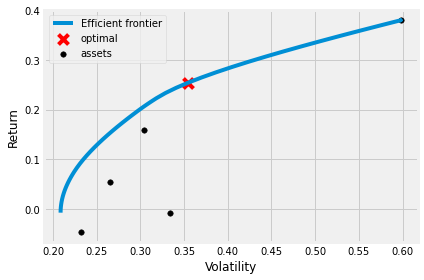

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

# Get the discrete allocation of each share per stock

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 10000)

allocation , leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AMZN': 3, 'TSLA': 32}
funds remaining: $1.50


In [ ]:
 def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio
def simulate_random_portfolios(total_portfolio_value, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, total_portfolio_value))
    for i in range(total_portfolio_value):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [stock for stock in assets])
        
    return results_df

In [ ]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
total_portfolio_value = 10000
rf = 0
results_frame = simulate_random_portfolios(total_portfolio_value, mean_returns, cov, rf)

In [ ]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
max_sharpe_port.to_frame()

,4126
ret,0.302477
stdev,0.336864
sharpe,0.897921
FB,0.051259
AMZN,0.547480
IBM,0.002790
GOOGL,0.012003
TSLA,0.386468


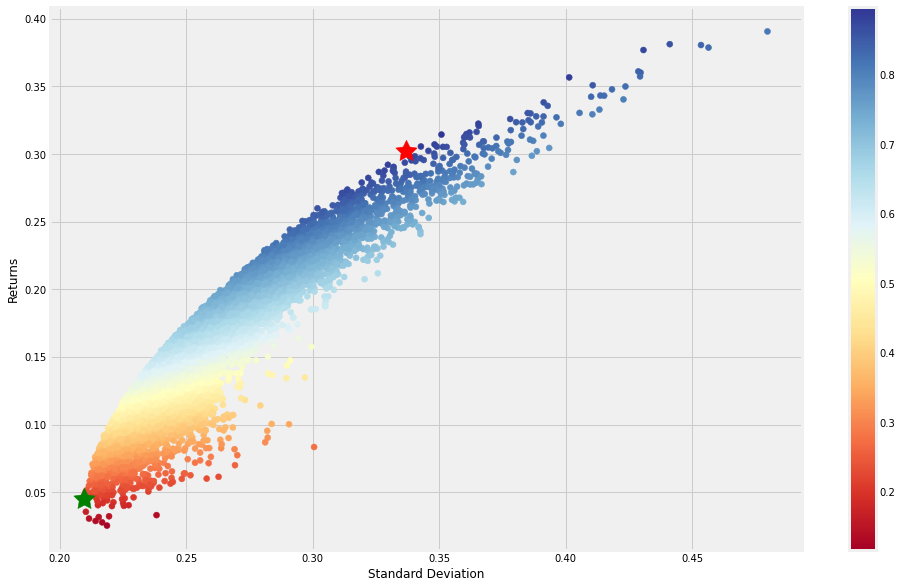

In [ ]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [ ]:
# maximum Sharpe portfolio
pd.options.display.max_rows = None
max_sharpe_port.to_frame()

,4126
ret,0.302477
stdev,0.336864
sharpe,0.897921
FB,0.051259
AMZN,0.547480
IBM,0.002790
GOOGL,0.012003
TSLA,0.386468


In [ ]:
#the minimum variance portfolio.
pd.options.display.max_rows = None
min_vol_port.to_frame()

,1732
ret,0.044945
stdev,0.209642
sharpe,0.214392
FB,0.095506
AMZN,0.043223
IBM,0.537619
GOOGL,0.288175
TSLA,0.035477


In [ ]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

In [ ]:
pd.options.display.max_rows = None
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=assets, columns=['Weights'])

,Weights
FB,0.00
AMZN,0.53
IBM,0.00
GOOGL,0.00
TSLA,0.47


In [ ]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std
def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_variance = min_variance(mean_returns, cov)

In [ ]:
pd.options.display.max_rows = None
pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=assets, columns=['Weights'])

,Weights
FB,0.13
AMZN,0.01
IBM,0.60
GOOGL,0.24
TSLA,0.02


#7.Portfolio weights that minimise the Conditional Value at Risk (CVaR)

In [ ]:
def calc_portfolio_perf_CVaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = days * np.sum(mean_returns * weights) 
    portfolio_std = np.sqrt(days) *  np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
    portfolio_CVaR = abs( portfolio_return - (portfolio_std  * stats.norm.pdf(stats.norm.ppf(alpha)) * alpha**-1))
    return  portfolio_return, portfolio_std , portfolio_CVaR


def simulate_random_portfolios_CVaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((4+len(mean_returns)-1, num_portfolios))

    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_CVaR = calc_portfolio_perf_CVaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] =  portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_CVaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    final_resul = pd.DataFrame(results_matrix.T,columns=['ret','stdev','CVaR'] + [stock for stock in assets])
        
    return final_resul

In [ ]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
total_portfolio_value = 10000
risk_free = 0
days = 252
alpha = 0.05
results = simulate_random_portfolios_CVaR(total_portfolio_value, mean_returns, cov, alpha, days)

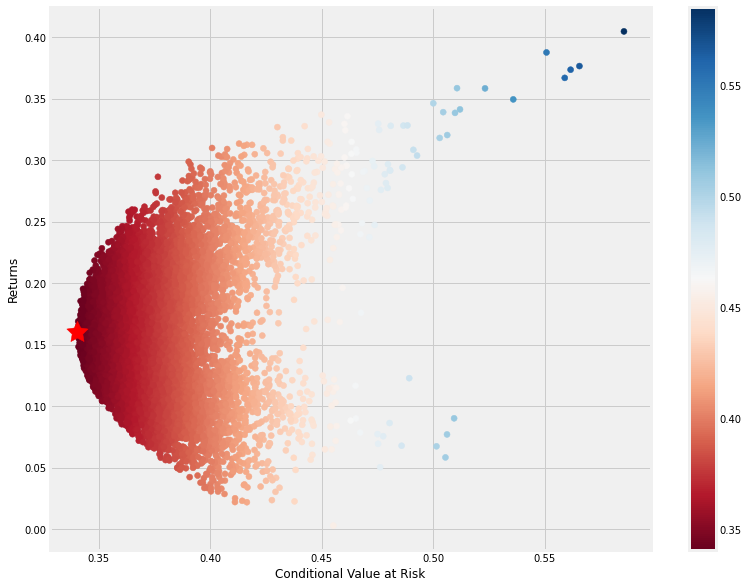

In [ ]:
min_CVaR_port = results.iloc[results['CVaR'].idxmin()]
width = 12
height = 10
plt.subplots(figsize=(width, height))
plt.scatter(results.CVaR,results.ret,c=results.CVaR,cmap='RdBu')
plt.xlabel('Conditional Value at Risk')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum CVaR portfolio
plt.scatter(min_CVaR_port[2],min_CVaR_port[0],marker=(5,1,0),color='r',s=500)

In [ ]:
pd.options.display.max_rows = None
min_CVaR_port.to_frame()

,192
ret,0.160204
stdev,0.242724
CVaR,0.340465
FB,0.008190
AMZN,0.304832
IBM,0.285523
GOOGL,0.227800
TSLA,0.173654


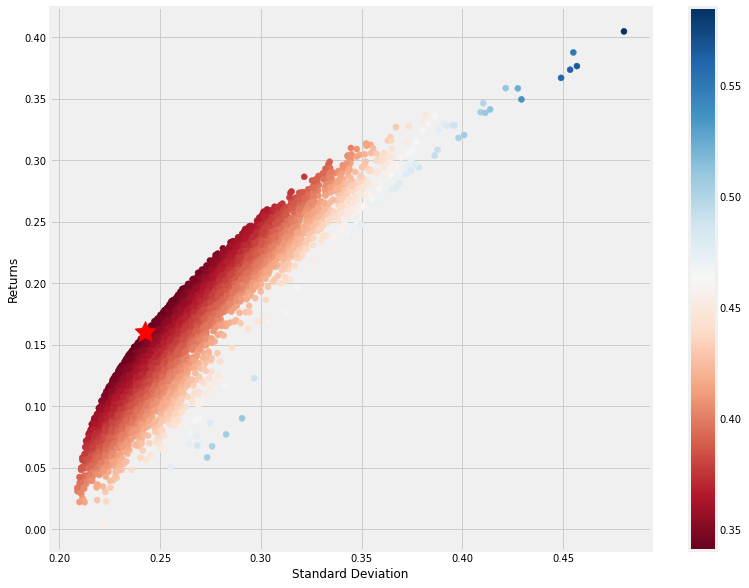

In [ ]:
min_CVaR_port = results.iloc[results['CVaR'].idxmin()]
width = 12
height = 10
plt.subplots(figsize=(width, height))
plt.scatter(results.stdev,results.ret,c=results.CVaR,cmap='RdBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_CVaR_port[1],min_CVaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [ ]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def calc_portfolio_CVaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = days * np.sum(mean_returns * weights) 
    portfolio_std =  np.sqrt(days) * np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_var
def min_CVaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha, days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_CVaR, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_CVaR = min_CVaR(mean_returns, cov, alpha, days)

In [ ]:
pd.options.display.max_rows = None
pd.DataFrame([round(x,3) for x in min_port_CVaR['x']],index=assets, columns=['Weights'])

,Weights
FB,0.000
AMZN,0.462
IBM,0.127
GOOGL,0.185
TSLA,0.226
